Files found: ['Aeff\\aeff_ARCA230_flavor_nue_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_nue_selection_track.txt', 'Aeff\\aeff_ARCA230_flavor_numu_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_numu_selection_track.txt', 'Aeff\\aeff_ARCA230_flavor_nutau_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_nutau_selection_track.txt']
Reading file: Aeff\aeff_ARCA230_flavor_nue_selection_shower.txt
Data shape: (140, 2)
Reading file: Aeff\aeff_ARCA230_flavor_nue_selection_track.txt
Data shape: (140, 2)
Reading file: Aeff\aeff_ARCA230_flavor_numu_selection_shower.txt
Data shape: (140, 2)
Reading file: Aeff\aeff_ARCA230_flavor_numu_selection_track.txt
Data shape: (140, 2)
Reading file: Aeff\aeff_ARCA230_flavor_nutau_selection_shower.txt
Data shape: (140, 2)
Reading file: Aeff\aeff_ARCA230_flavor_nutau_selection_track.txt
Data shape: (140, 2)


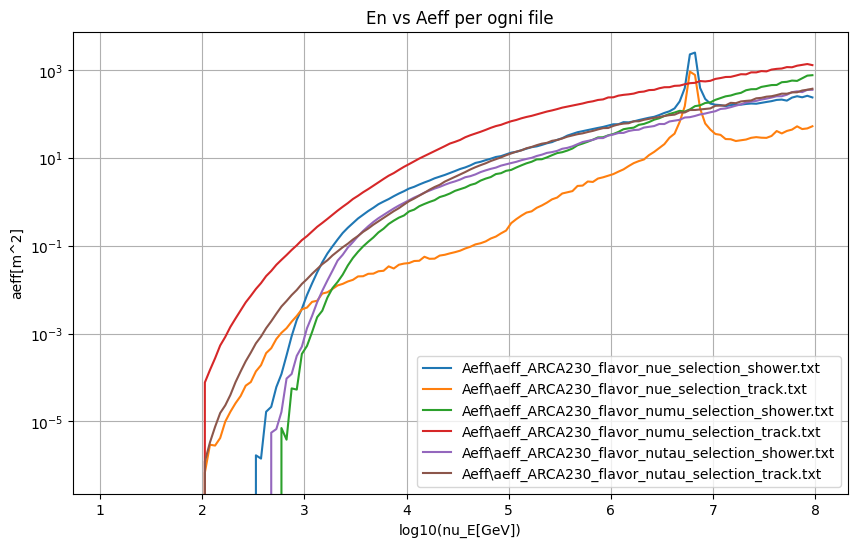

In [76]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# Trova tutti i file che corrispondono al pattern
Aeff_list = glob.glob('Aeff/aeff_ARCA230_flavor_*.txt')

# Verifica che i file siano trovati correttamente
print("Files found:", Aeff_list)

# Inizializza il plot
plt.figure(figsize=(10, 6))

# Itera attraverso ogni file e plottane i dati
for aef in Aeff_list:
    print(f"Reading file: {aef}")  # Debug: stampa il nome del file
    # Usa np.genfromtxt per saltare la prima riga (header)
    try:
        data = np.genfromtxt(aef, delimiter=',', skip_header=1)
        print("Data shape:", data.shape)  # Debug: stampa la forma dei dati

        # Assicurati che i dati non siano vuoti
        if data.size == 0:
            print(f"No data found in {aef}")
            continue

        # Escludi la prima colonna
        En = data[1:, 0]
        Aeff = data[1:, 1]
        
        
        # Plotta En vs Aeff
        plt.plot(En, Aeff, label=aef)
    except Exception as e:
        print(f"Error reading {aef}: {e}")

# Aggiungi etichette e titolo
plt.xlabel('log10(nu_E[GeV])')
plt.yscale('log')


plt.ylabel('aeff[m^2]')
plt.title('En vs Aeff per ogni file')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.show()


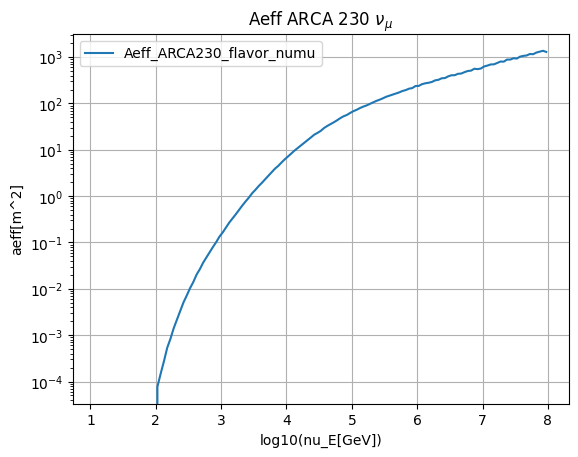

In [77]:
data_aeff = np.genfromtxt('Aeff/aeff_ARCA230_flavor_numu_selection_track.txt', delimiter=',', skip_header=1)
Aeff = data_aeff[1:, 1]
#Aeff = pow(10, Aeff)
#print(Aeff)
En = data_aeff[1:, 0]
plt.plot(En, Aeff, label='Aeff_ARCA230_flavor_numu')
plt.xlabel('log10(nu_E[GeV])')
plt.yscale('log')


plt.ylabel('aeff[m^2]')
plt.title(r'Aeff ARCA 230 $\nu_{\mu}$')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.show()


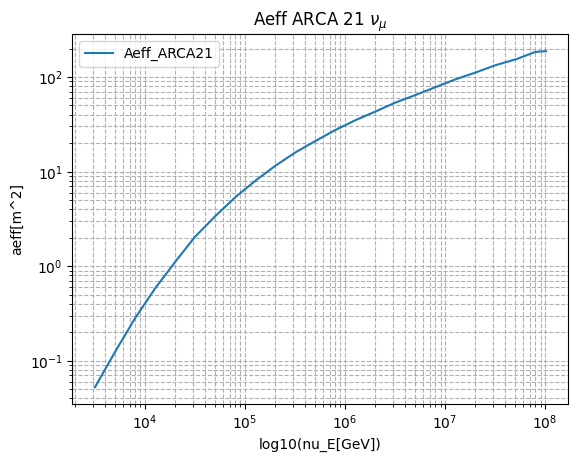

In [78]:
data_aeff = np.genfromtxt('Aeff/effectiveaream2.dat', delimiter=',')
Aeff = data_aeff[1:, 1]
#Aeff = pow(10, Aeff)
#print(Aeff)
En = data_aeff[1:, 0]
plt.plot(En, Aeff, label='Aeff_ARCA21')
plt.xlabel('log10(nu_E[GeV])')
plt.yscale('log')
plt.xscale('log')


plt.ylabel('aeff[m^2]')
plt.title(r'Aeff ARCA 21 $\nu_{\mu}$')
plt.legend()
plt.grid(True, which='both', ls='--')

# Mostra il plot
plt.show()

In [117]:
from scipy.interpolate import interp1d
import numpy as np
data_aeff = np.genfromtxt('Aeff/aeff_ARCA230_flavor_numu_selection_track.txt', skip_header=1, delimiter=',')
Aeff = data_aeff[:, 1]
#Aeff = pow(10, Aeff)
#print(Aeff)
En = data_aeff[:, 0]
En = pow(10, En)
print(En)
data_flux = np.loadtxt('SN_IIP_D0_01/SNIIP_22_D0_01_block_29.dat')
#data_flux = np.loadtxt('SN_IIn/SNIIn_22_block_26.dat')
CR = data_flux[:, -1]
CR_condizione = CR == 1
E_all = data_flux[:, 0][CR_condizione]
E = E_all[E_all>3e8]
dN_dE = data_flux[:, 7][CR_condizione][E_all>3e8]
S_IIp_start = 1e3 * pow(10., 0.1 * (29 - 1))
S_IIp_stop =1e8
flux = (1/3)*dN_dE/1e9*(S_IIp_stop-S_IIp_start)


data_flux_2 = np.loadtxt('SN_IIn/SNIIn_20_block_26.dat')  # Percorso per la seconda supernova
CR_2 = data_flux_2[:, -1]
CR_condizione_2 = CR_2 == 1
E_all_2 = data_flux_2[:, 0][CR_condizione_2]
E_2 = E_all_2[E_all_2 > 3e8]
dN_dE_2 = data_flux_2[:, 7][CR_condizione_2][E_all_2 > 3e8]
flux_2 = (1/3) * dN_dE_2 / 1e9

# Interpolazione per il flusso della seconda supernova
interpolation_flux_2 = interp1d(E_2, flux_2, kind='cubic', fill_value="extrapolate")
E_new_2 = np.linspace(E_2.min(), E_2.max(), 500)
flux_new_2 = interpolation_flux_2(E_new_2)

from scipy.interpolate import interp1d
# Interpolazione dei dati
interpolation_function = interp1d(En, Aeff, kind='cubic', fill_value="extrapolate")
En_new = np.linspace(En.min(), En.max(), 500)
Aeff_new = interpolation_function(En_new)

interpolation_flux = interp1d(E, flux,kind='cubic', fill_value="extrapolate")
E_new = np.linspace(E.min(), E.max(), 500)
flux_new = interpolation_flux(E_new)

[1.05925373e+01 1.18850223e+01 1.33352143e+01 1.49623566e+01
 1.67880402e+01 1.88364909e+01 2.11348904e+01 2.37137371e+01
 2.66072506e+01 2.98538262e+01 3.34965439e+01 3.75837404e+01
 4.21696503e+01 4.73151259e+01 5.30884444e+01 5.95662144e+01
 6.68343918e+01 7.49894209e+01 8.41395142e+01 9.44060876e+01
 1.05925373e+02 1.18850223e+02 1.33352143e+02 1.49623566e+02
 1.67880402e+02 1.88364909e+02 2.11348904e+02 2.37137371e+02
 2.66072506e+02 2.98538262e+02 3.34965439e+02 3.75837404e+02
 4.21696503e+02 4.73151259e+02 5.30884444e+02 5.95662144e+02
 6.68343918e+02 7.49894209e+02 8.41395142e+02 9.44060876e+02
 1.05925373e+03 1.18850223e+03 1.33352143e+03 1.49623566e+03
 1.67880402e+03 1.88364909e+03 2.11348904e+03 2.37137371e+03
 2.66072506e+03 2.98538262e+03 3.34965439e+03 3.75837404e+03
 4.21696503e+03 4.73151259e+03 5.30884444e+03 5.95662144e+03
 6.68343918e+03 7.49894209e+03 8.41395142e+03 9.44060876e+03
 1.05925373e+04 1.18850223e+04 1.33352143e+04 1.49623566e+04
 1.67880402e+04 1.883649

In [118]:
import scipy.integrate as spi
d=10 * 3.086e19

def integranda_nev(e):
    #T = 2.484864e7
    Aeff = interpolation_function(e)
    flux = interpolation_flux(e)
    geom_con = 1/(4*np.pi*d**2)
    return Aeff*(flux)*geom_con#*T


n_ev, _ = spi.quad(integranda_nev, En.min(), En.max(), limit=500)
print(n_ev)




181.48679898245538


C:\Users\Asus\AppData\Local\Temp\ipykernel_22508\2266579524.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  n_ev, _ = spi.quad(integranda_nev, En.min(), En.max(), limit=500)


C:\Users\Asus\AppData\Local\Temp\ipykernel_22508\12081740.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  n_ev, _ = spi.quad(integranda_nev, En.min(), En.max(), args=(d,), limit=500)  # Integrazione numerica
C:\Users\Asus\AppData\Local\Temp\ipykernel_22508\12081740.py:34: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  n_ev_2, _ = spi.quad(integranda_nev2, En.min(), En.max(), args=(d, ), limit=500)


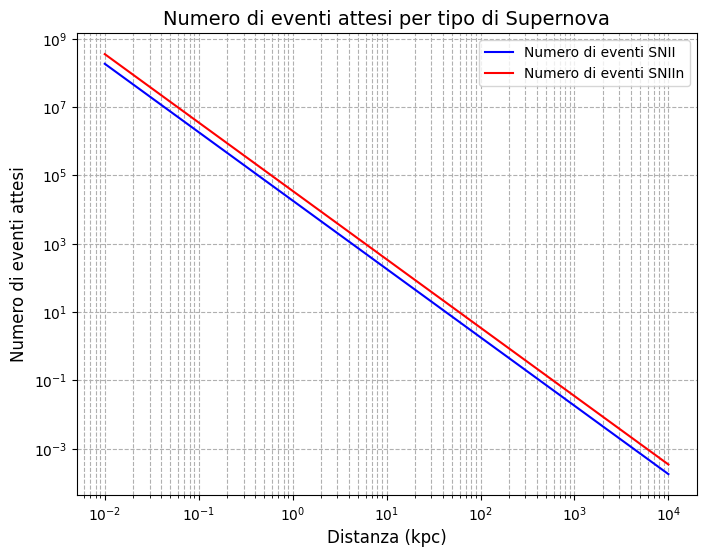

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Distanza variabile (da 10 pc a 10 Mpc)
d_min = 10 * 3.086e16  # 10 pc in metri
d_max = 10 * 3.086e22  # 10 Mpc in metri
d_values = np.logspace(np.log10(d_min), np.log10(d_max), 100)  # Valori logaritmici tra 10 pc e 10 Mpc

# Funzione per calcolare il numero di eventi al variare di d
def integranda_nev(e, d):
    #T = 2.484864e7 # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux(e)  # Funzione interpolata per il flusso
    geom_con = 1/(4 * np.pi * d**2)  # Fattore geometrico in funzione di d
    return Aeff * flux * geom_con #* T  # Restituisce l'integranda


def integranda_nev2(e, d):
    #T = 2.484864e7  # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux_2(e)  # Funzione interpolata per il flusso
    geom_con = 1/(4 * np.pi * d**2)  # Fattore geometrico in funzione di d
    return Aeff * flux * geom_con #*T  # Restituisce l'integranda
# Lista per memorizzare il numero di eventi per ogni d
n_ev_snii_p = []
n_ev_snii_n = []

# Ciclo su ogni distanza d e calcolo del numero di eventi
for d in d_values:
    n_ev, _ = spi.quad(integranda_nev, En.min(), En.max(), args=(d,), limit=500)  # Integrazione numerica
    n_ev_snii_p.append(n_ev)  # Salva il numero di eventi calcolato

    n_ev_2, _ = spi.quad(integranda_nev2, En.min(), En.max(), args=(d, ), limit=500)
    n_ev_snii_n.append(n_ev_2)

# Convertire d_values da metri a parsec per il grafico
d_values_pc = d_values / 3.086e19  # 1 kparsec = 3.086e19 metri

# Creare il grafico del numero di eventi in funzione di d espressa in pc
plt.figure(figsize=(8, 6))

# Grafico per il numero di eventi della prima supernova (SNIIP)
plt.plot(d_values_pc, n_ev_snii_p, label='Numero di eventi SNII', color='blue')

# Grafico per il numero di eventi della seconda supernova (SNIIb)
plt.plot(d_values_pc, n_ev_snii_n, label='Numero di eventi SNIIn', color='red')




plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Distanza (kpc)', fontsize=12)
plt.ylabel('Numero di eventi attesi', fontsize=12)
plt.title('Numero di eventi attesi per tipo di Supernova', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

[1.         0.9972096  0.99674797 0.99674797 0.99482121 0.90097598
 0.74852142 0.67586416 0.63078829 0.58083713 0.53854317 0.50100318
 0.45288221 0.40310975 0.32805884 0.18682445 0.00330722 0.00162602
 0.        ]
[-90 -80 -70 -60 -50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80
  90]


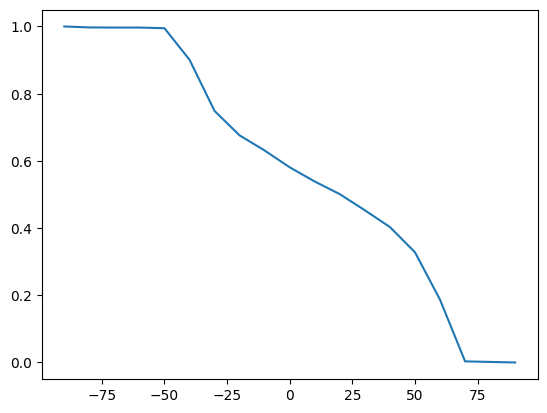

In [82]:

vis = np.genfromtxt('visibility.txt', delimiter=';')

dec = vis[:,0]
perc = vis[:,1]
interpolation_visibility = interp1d(dec, perc, kind='linear')
dec_new = np.arange(-90, 100, 10)
vis_new= interpolation_visibility(dec_new)/100

print(vis_new)
plt.plot(dec_new, vis_new)
print(dec_new)

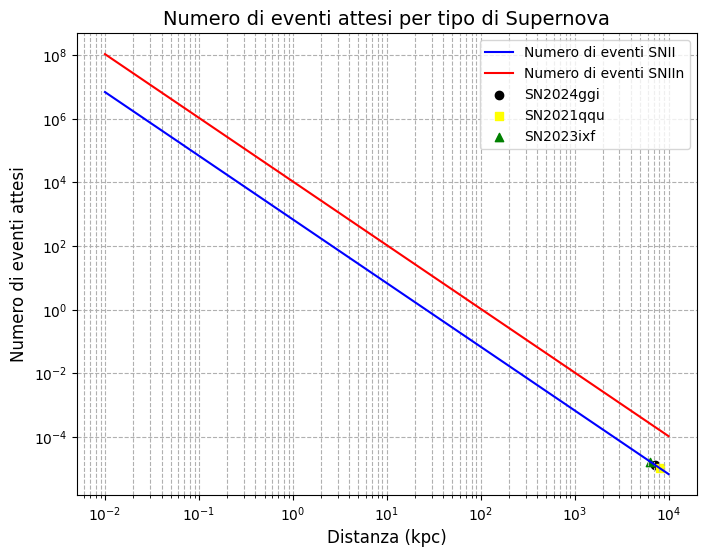

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Distanza variabile (da 10 kpc a 10 Mpc)
d_min = 10 * 3.086e16  # 10 pc in metri
d_max = 10 * 3.086e22  # 10 Mpc in metri
d_values = np.logspace(np.log10(d_min), np.log10(d_max), 100)  # Valori logaritmici tra 10 kpc e 10 Mpc

# Funzione per calcolare il numero di eventi al variare di d
def integranda_nev(e, d):
    T = 2.484864e7  # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux(e)  # Funzione interpolata per il flusso
    geom_con = 1/(4 * np.pi * d**2)  # Fattore geometrico in funzione di d
    return Aeff * flux  * geom_con * T  # Restituisce l'integranda


def integranda_nev2(e, d):
    T = 2.484864e7  # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux_2(e)  # Funzione interpolata per il flusso
    geom_con = 1/(4 * np.pi * d**2)  # Fattore geometrico in funzione di d
    return Aeff * flux * geom_con * T  # Restituisce l'integranda
# Lista per memorizzare il numero di eventi per ogni d
n_ev_snii_p = []
n_ev_snii_n = []

# Ciclo su ogni distanza d e calcolo del numero di eventi
for d in d_values:
    n_ev, _ = spi.quad(integranda_nev, En.min(), En.max(), args=(d,), limit=500)  # Integrazione numerica
    n_ev_snii_p.append(n_ev)  # Salva il numero di eventi calcolato

    n_ev_2, _ = spi.quad(integranda_nev2, En.min(), En.max(), args=(d, ), limit=500)
    n_ev_snii_n.append(n_ev_2)

# Convertire d_values da metri a parsec per il grafico
d_values_pc = d_values / 3.086e19  # 1 kparsec = 3.086e19 metri

# Creare il grafico del numero di eventi in funzione di d espressa in pc
plt.figure(figsize=(8, 6))

# Grafico per il numero di eventi della prima supernova (SNIIP)
plt.plot(d_values_pc, n_ev_snii_p, label='Numero di eventi SNII', color='blue')

# Grafico per il numero di eventi della seconda supernova (SNIIb)
plt.plot(d_values_pc, n_ev_snii_n, label='Numero di eventi SNIIn', color='red')

# Distanze in Mpc per i punti aggiuntivi
d_mpc_points = [7.2, 8.1, 6.4]
# Convertire le distanze da Mpc a kpc (perché d_values_pc è in kpc)
d_kpc_points = np.array(d_mpc_points) * 1e3

# Interpolare il numero di eventi per le distanze specifiche sulla curva SNII (rossa)
n_ev_interpolated_points = np.interp(d_kpc_points, d_values_pc, n_ev_snii_p)

# Nomi delle supernove corrispondenti
supernova_labels = ['SN2024ggi', 'SN2021qqu', 'SN2023ixf']

# Marker diversi per ciascun punto
markers = ['o', 's', '^']  # Cerchio, quadrato, triangolo

colors = ['black', 'yellow', 'green']

# Aggiungere i punti sulla curva SNII con label e simboli diversi
for i, (d, nev, label, marker, color) in enumerate(zip(d_kpc_points, n_ev_interpolated_points, supernova_labels, markers, colors)):
    plt.scatter(d, nev, color=color, marker=marker, label=label)  # Aggiungi il punto con simbolo diverso

plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Distanza (kpc)', fontsize=12)
plt.ylabel('Numero di eventi attesi', fontsize=12)
plt.title('Numero di eventi attesi per tipo di Supernova', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


In [89]:
n_ev_interpolated_points

array([1.32820205e-05, 1.05021388e-05, 1.67458239e-05])

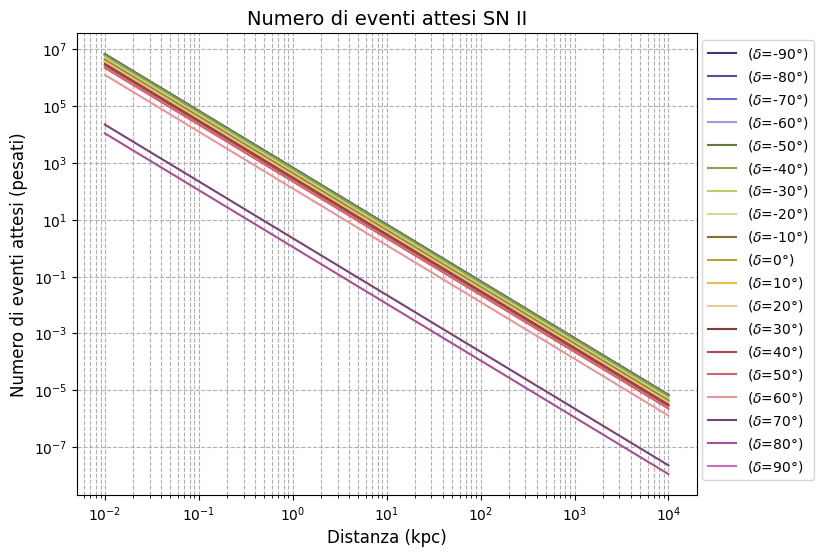

In [84]:
import matplotlib.cm as cm
# Moltiplicazione per i numeri di eventi
n_ev_snii_p_weighted = np.array(n_ev_snii_p) * vis_new.reshape(-1, 1)  # Broadcasting

plt.figure(figsize=(8, 6))

cmap = plt.cm.tab20b
# Grafico per il numero di eventi della prima supernova (SNIIP)
for i in range(len(dec_new)):
    plt.plot(d_values_pc, n_ev_snii_p_weighted[i], label=f'($\delta$={dec_new[i]}°)', color=cmap(i / len(dec_new)), lw=1.5 ,alpha=1)



plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Distanza (kpc)', fontsize=12)
plt.ylabel('Numero di eventi attesi (pesati)', fontsize=12)
plt.title('Numero di eventi attesi SN II', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))   

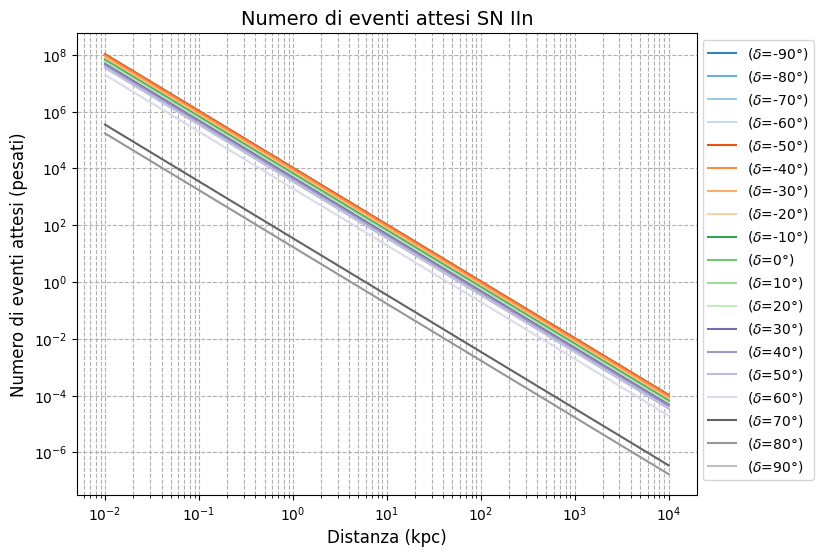

In [85]:

n_ev_snii_n_weighted = np.array(n_ev_snii_n) * vis_new.reshape(-1, 1)  # Broadcasting

# Creare il grafico del numero di eventi pesati in funzione di d espressa in pc
plt.figure(figsize=(8, 6))

cmap = plt.cm.tab20c

for i in range(len(dec_new)):
    plt.plot(d_values_pc, n_ev_snii_n_weighted[i], label=f'($\delta$={dec_new[i]}°)',  color=cmap(i / len(dec_new)), alpha=1)

plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Distanza (kpc)', fontsize=12)
plt.ylabel('Numero di eventi attesi (pesati)', fontsize=12)
plt.title('Numero di eventi attesi SN IIn', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))   

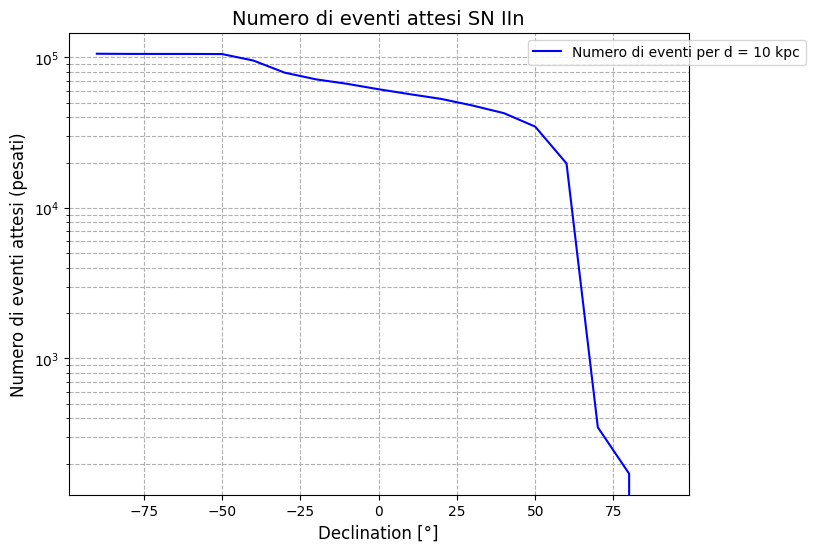

In [86]:
def integranda_nev2(e, dec):
    T = 2.484864e7  # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux_2(e)  # Funzione interpolata per il flusso
     
    geom_con = 1/(4 * np.pi *10 * 3.086e19**2)  # Fattore geometrico in funzione di d
    source_vis = interpolation_visibility(dec)
    return Aeff * flux * geom_con * T * source_vis # Restituisce l'integranda

n_ev_snii_n10=[]

for dec in dec_new:
    n_ev_2, _ = spi.quad(integranda_nev2, En.min(), En.max(), args=(dec, ), limit=500)
    n_ev_snii_n10.append(n_ev_2)


plt.figure(figsize=(8, 6))


plt.plot(dec_new, n_ev_snii_n10, label='Numero di eventi per d = 10 kpc', color='blue')    

#plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Declination [°]', fontsize=12)
plt.ylabel('Numero di eventi attesi (pesati)', fontsize=12)
plt.title('Numero di eventi attesi SN IIn', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) 

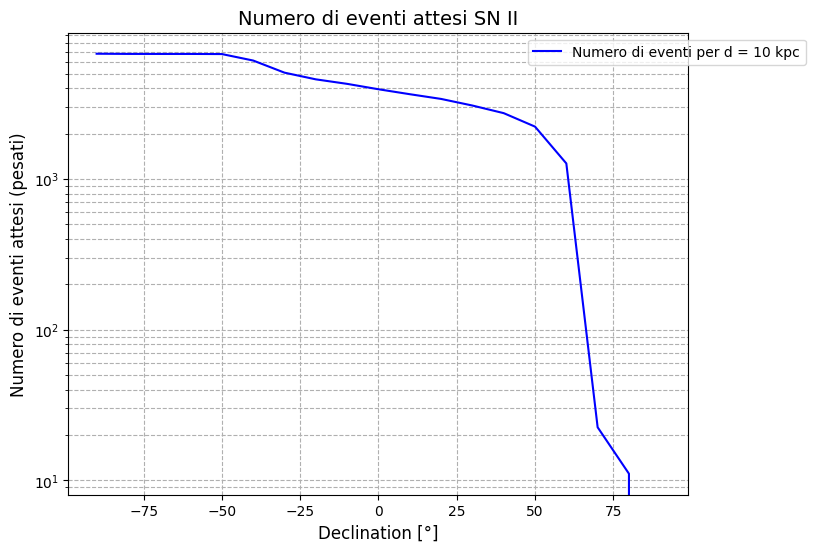

In [87]:
def integranda_nev(e, dec):
    T = 2.484864e7  # ARCA21 lifetime (287.6 giorni)
    Aeff = interpolation_function(e)  # Funzione interpolata per l'area efficace
    flux = interpolation_flux(e)  # Funzione interpolata per il flusso
     
    geom_con = 1/(4 * np.pi *10 * 3.086e19**2)  # Fattore geometrico in funzione di d
    source_vis = interpolation_visibility(dec)
    return Aeff * flux * geom_con * T * source_vis # Restituisce l'integranda

n_ev_snii_p10=[]

for dec in dec_new:
    n_ev_, _ = spi.quad(integranda_nev, En.min(), En.max(), args=(dec, ), limit=500)
    n_ev_snii_p10.append(n_ev_)


plt.figure(figsize=(8, 6))


plt.plot(dec_new, n_ev_snii_p10, label='Numero di eventi per d = 10 kpc', color='blue')    

#plt.xscale('log')  # Scala logaritmica per l'asse delle x (distanza)
plt.yscale('log')  # Scala logaritmica per l'asse delle y (numero di eventi)
plt.xlabel('Declination [°]', fontsize=12)
plt.ylabel('Numero di eventi attesi (pesati)', fontsize=12)
plt.title('Numero di eventi attesi SN II', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) 